# Feature Extraction – Synthetic Data

Approach:
- Create synthetic drilling data
- Add noise of some characteristic to the data
- Use PCA to see if there are any clusters
- Create new, independent synthetic data
- Add same noise in different termporal locations in the signal 
- Use same PCA scores and look for similar clusters

### Create Synthetic Data

In [291]:
import numpy as np
import matplotlib.pyplot as plt

n = 360
t = np.arange(1, n+1)
trend = 2 + 0.01 * t
seasonal = np.sin(2 * np.pi * t / 12)
cyclical = np.sin(2 * np.pi * t / 60)
irregular = np.random.randn(n)
y = trend + seasonal + cyclical + irregular

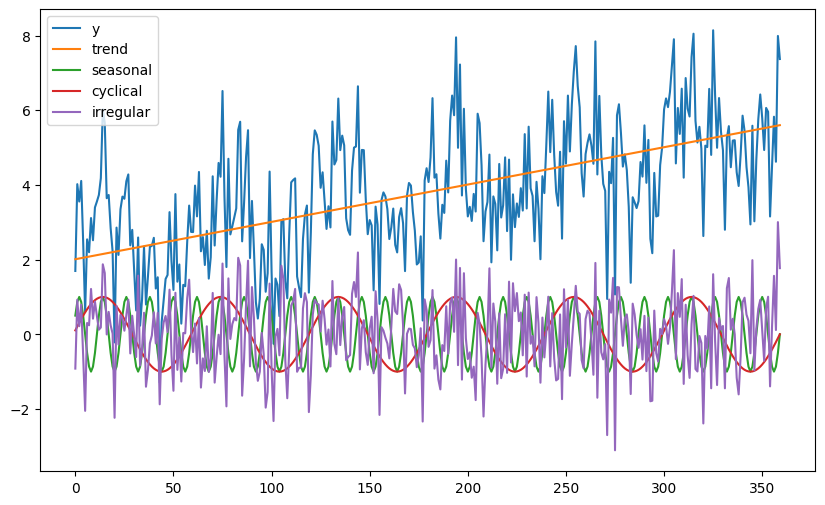

In [292]:
plt.subplots(figsize=(10, 6))
plt.plot(y, label="y")
plt.plot(trend, label="trend")
plt.plot(seasonal, label="seasonal")
plt.plot(cyclical, label="cyclical")
plt.plot(irregular, label="irregular")
plt.legend()

## Compute IMFs

In [293]:
from PyEMD import EMD, Visualisation

# Calculate IMFs of y
emd = EMD()
IMFs = emd(y)

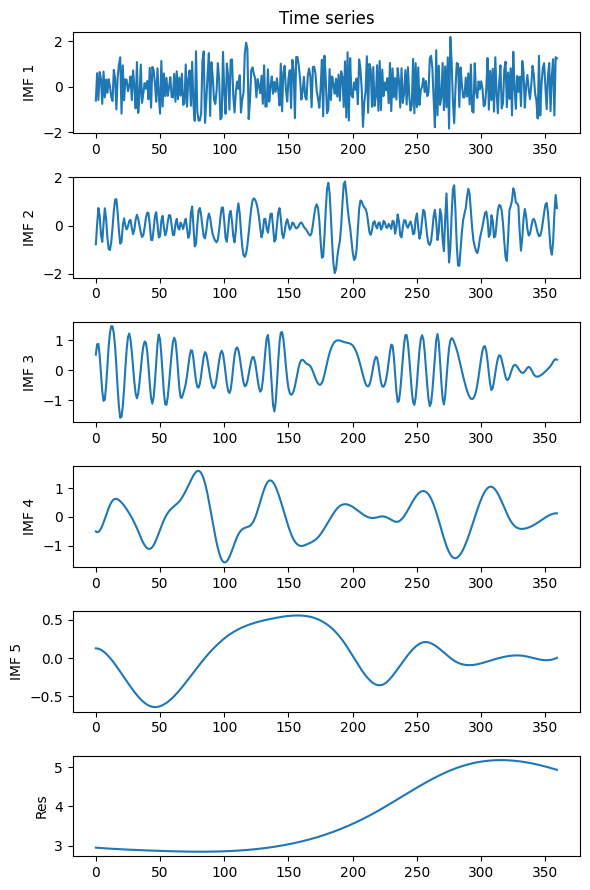

In [294]:
# Plot IMFs using built in visualization functionality
Visualisation(emd).plot_imfs()

## Calculate FFT of IMFs

In [295]:
from scipy.fft import fft, fftfreq, fftshift

# Calculate values of x after fft
x_fft = fftfreq(n, 1)
x_fft = fftshift(x_fft)

# Take the FFT of all IMFs
y_ffts = []
for imf in IMFs:
    y_ffts.append(fftshift(fft(imf)))

In [296]:
# Calculate fft of the seasonal and cyclical trend for visualization
seasonal_fft = fft(seasonal)
seasonal_fft = fftshift(seasonal_fft)

cyclical_fft = fft(cyclical)
cyclical_fft = fftshift(cyclical_fft)

irregular_fft = fft(irregular)
irregular_fft = fftshift(irregular_fft)

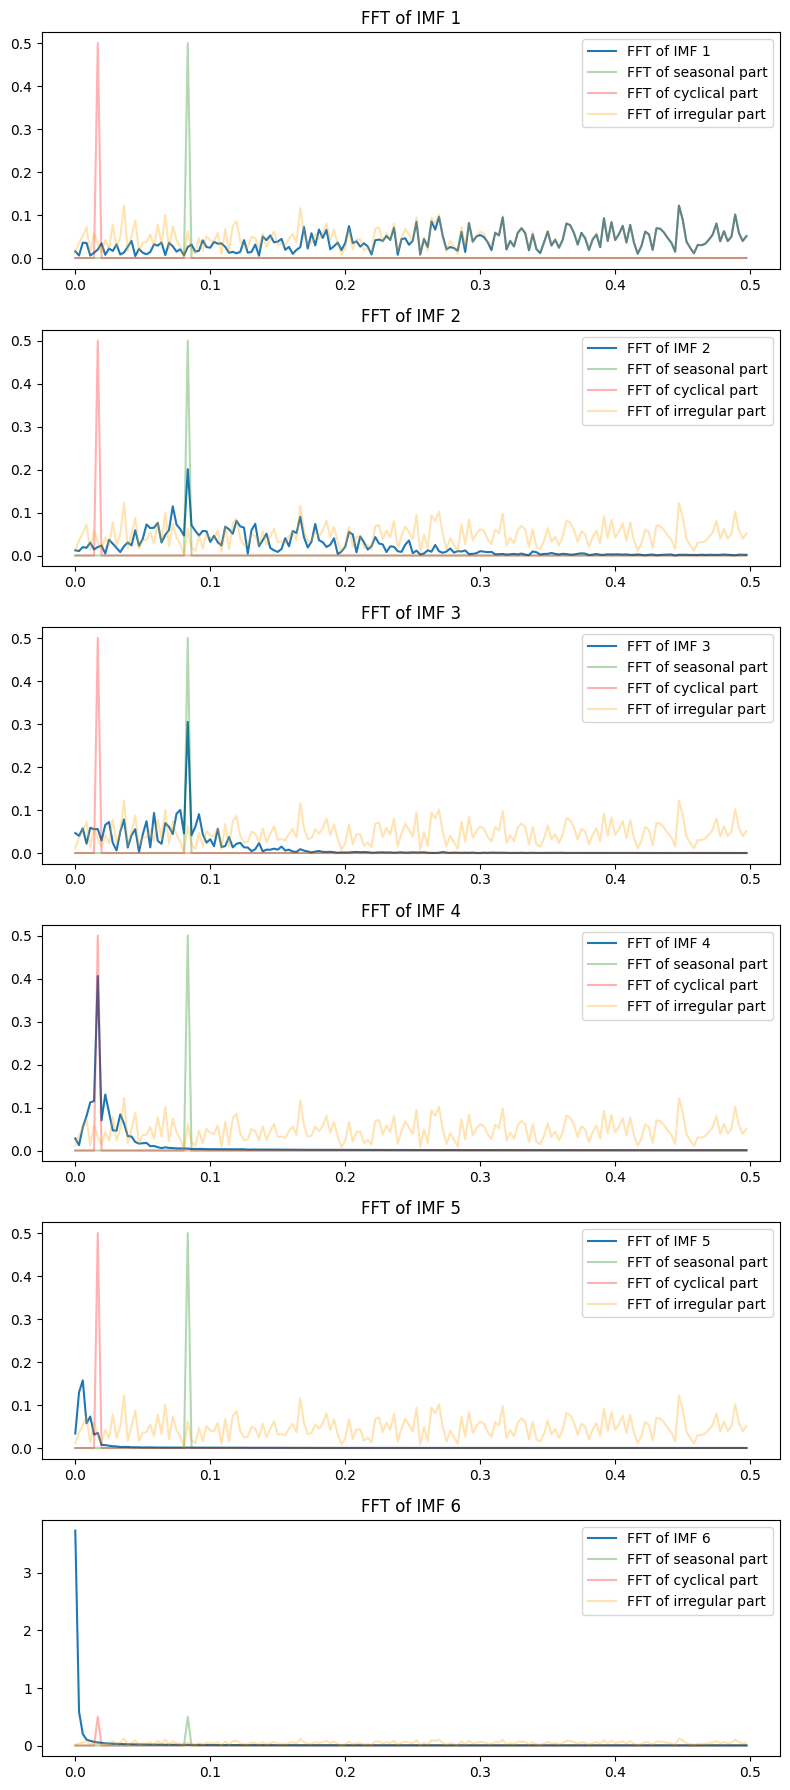

In [297]:
plt.subplots(len(y_ffts), 1, figsize=(8, 3 * len(y_ffts)))
for i, y_fft in enumerate(y_ffts):
    plt.subplot(len(y_ffts), 1, i+1)
    plt.plot(x_fft[n//2:], 1/n * abs(y_fft[n//2:]), label=f"FFT of IMF {i+1}")
    plt.plot(x_fft[n//2:], 1/n * abs(seasonal_fft[n//2:]), label="FFT of seasonal part", color="green", alpha=0.3)
    plt.plot(x_fft[n//2:], 1/n * abs(cyclical_fft[n//2:]), label="FFT of cyclical part", color="red", alpha=0.3)  
    plt.plot(x_fft[n//2:], 1/n * abs(irregular_fft[n//2:]), label="FFT of irregular part", color="orange", alpha=0.3) 
    plt.title(f"FFT of IMF {i+1}")
    plt.legend()
plt.tight_layout()

## Calculate FFT on non-decomposed signal

In [298]:
y_nodecompose_fft = fft(y)
y_nodecompose_fft = fftshift(y_nodecompose_fft)

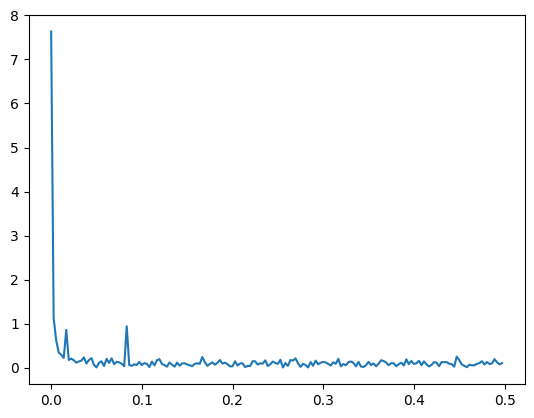

In [299]:
plt.plot(x_fft[n//2:], 2/n * abs(y_nodecompose_fft[n//2:]))

## Remove trend using last IMF and perform FFT

In [300]:
# Remove trend from signal by subtracting the last IMF
y_notrend = y - IMFs[-1]

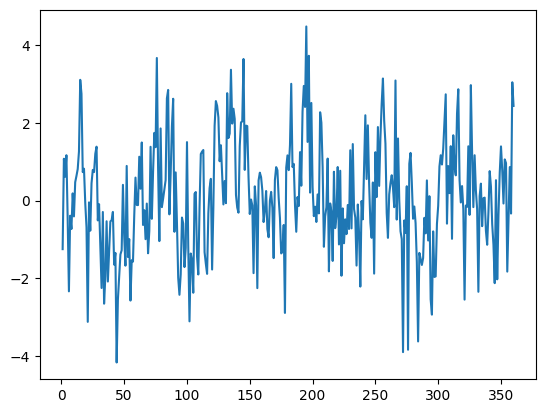

In [301]:
plt.plot(t, y_notrend)

In [312]:
# Check for stationarity by calculating the mean of different parts of the data

# Split data into 6 parts
split_size = len(y_notrend) / 6

splits = []
for i in range(6):
    splits.append(y_notrend[i*split_size:(i+1)*split_size])

TypeError: slice indices must be integers or None or have an __index__ method

In [304]:
y_fft_notrend = fft(y_notrend)
y_fft_notrend = fftshift(y_fft_notrend)

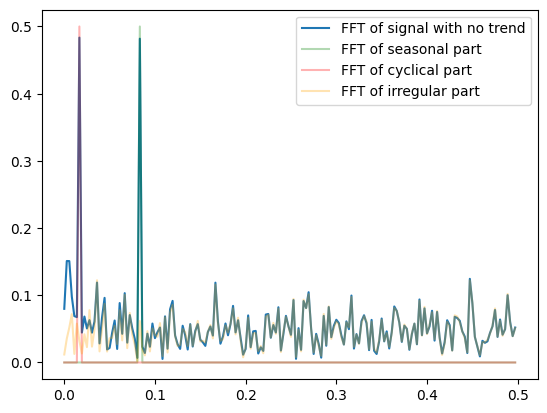

In [309]:
plt.plot(x_fft[n//2:], 1/n * abs(y_fft_notrend[n//2:]), label="FFT of signal with no trend")
plt.plot(x_fft[n//2:], 1/n * abs(seasonal_fft[n//2:]), label="FFT of seasonal part", color="green", alpha=0.3)
plt.plot(x_fft[n//2:], 1/n * abs(cyclical_fft[n//2:]), label="FFT of cyclical part", color="red", alpha=0.3)  
plt.plot(x_fft[n//2:], 1/n * abs(irregular_fft[n//2:]), label="FFT of irregular part", color="orange", alpha=0.3)
plt.legend()